# IMPORTS

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import cv2 
from torchvision import datasets, transforms
from torchvision.transforms import Pad
import utils.preprocessing as pp
from utils.loader import Loader

In [87]:
import torch
print(torch.cuda.is_available())  # This will return True if a GPU is available

# Check which GPU is being used
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))  # This will return the name of the GPU


True
NVIDIA GeForce RTX 4060 Laptop GPU


# Reading the dataset

In [6]:
import importlib
import utils.utilities  # Replace with the module you're working on

importlib.reload(utils.utilities)
TRAIN_PATH = r"C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/Computer_Aided_Diagnosis/Labs/Datasets/train/train"
VAL_PATH = r"C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/Computer_Aided_Diagnosis/Labs/Datasets/val/val"

transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert image to PyTorch tensor
])

train_loader: Loader = utl.Loader(TRAIN_PATH, transform=transform, percentage = 50)
val_loader: Loader = utl.Loader(VAL_PATH, transform=transform, percentage = 50)

print(f"Total images training: {len(train_loader)}")
print(f"Total images validation: {len(val_loader)}")

Total images training: 7597
Total images validation: 1898


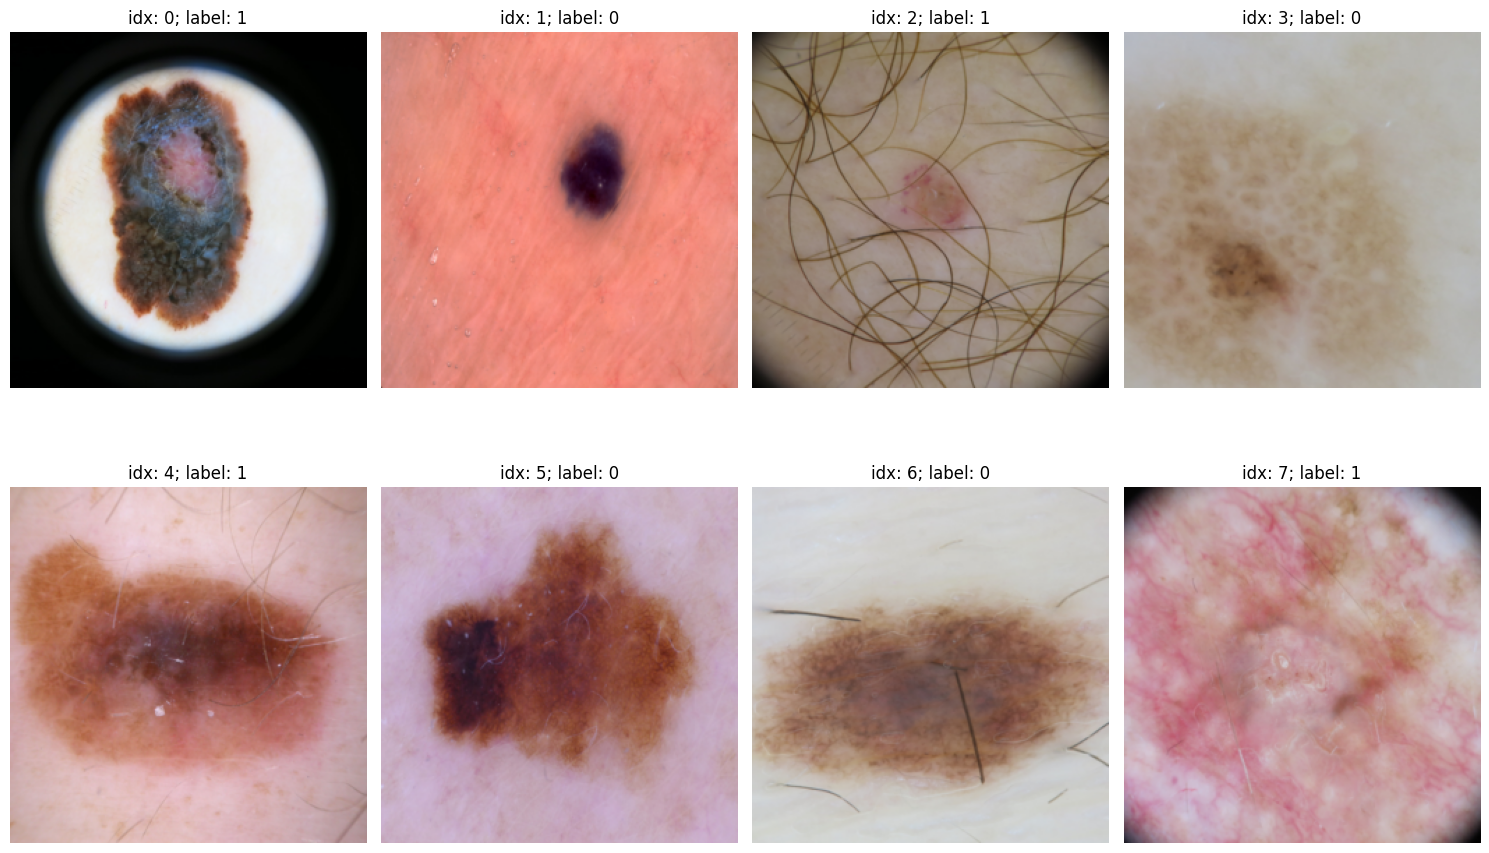

In [93]:
train_loader.show_images(8, False)


# Training images

In [94]:
NEV_PATH_train = os.path.join(TRAIN_PATH, "nevus")
OTH_PATH_train = (os.path.join(TRAIN_PATH, "others"))
print(f"NEVUS: {len(os.listdir(NEV_PATH_train))}")
print(f"OTHERS: {len(os.listdir(OTH_PATH_train))}")
print(f"Ratio Nevus/Others: {len(os.listdir(NEV_PATH_train)) / len(os.listdir(OTH_PATH_train))}")

NEVUS: 7725
OTHERS: 7470
Ratio Nevus/Others: 1.034136546184739


In [95]:
NEV_PATH_val = os.path.join(VAL_PATH, "nevus")
OTH_PATH_val = (os.path.join(VAL_PATH, "others"))
print(f"NEVUS: {len(os.listdir(NEV_PATH_val))}")
print(f"OTHERS: {len(os.listdir(OTH_PATH_val))}")
print(f"Ratio Nevus/Others: {len(os.listdir(NEV_PATH_val)) / len(os.listdir(OTH_PATH_val))}")

NEVUS: 1931
OTHERS: 1865
Ratio Nevus/Others: 1.0353887399463806


# Factory

In [3]:
#This was necessary to load the function again, since the "get_steps" attribute was not being properly loaded
import importlib
import utils.loader
import utils.preprocessing
importlib.reload(utils.preprocessing)
importlib.reload(utils.loader)

<module 'utils.loader' from 'c:\\Users\\User\\GitHub_Projects\\CADx-Project\\utils\\loader.py'>

7597


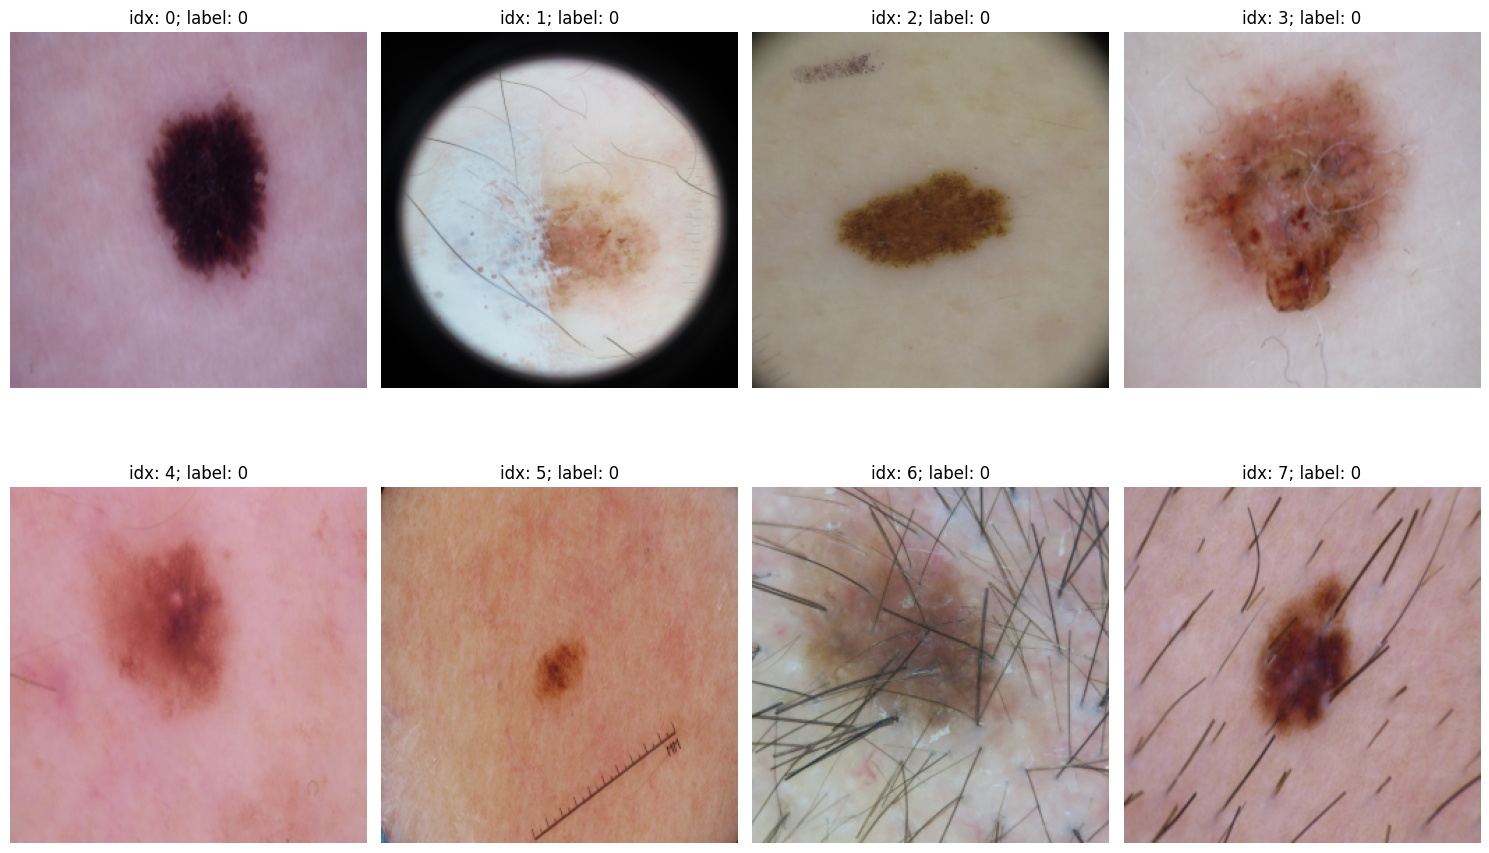

In [4]:
from utils.loader import FactoryLoader
from utils.preprocessing import PreprocessingFactory, PreprocessMelanoma

#TRAIN_PATH = r"C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/Computer_Aided_Diagnosis/Labs/Datasets/train/train/nevus/nev02029.jpg"
TRAIN_PATH = r"C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/Computer_Aided_Diagnosis/Labs/Datasets/train/train/"

factory = PreprocessingFactory()

factory.crop_roi()
factory.gaussian_smoothing(kernel_size=5)
factory.resize((256, 256)) 
factory.normalize2float()


factory.get_steps()

#image = cv2.imread(TRAIN_PATH)  # Load your image
#processed_image = preprocessor(image)    # Apply the preprocessing

# Processed image is now ready for further use
#print(processed_image.shape)

ldr = FactoryLoader(path=TRAIN_PATH, batch_size=32, factory=factory, percentage=50)
print(len(ldr))
ldr.show_images(num_images=8, randomize=False)

In [8]:
ldr.get_num_classes()

2

# Feature extraction

In [5]:
import utils.feature_extraction


importlib.reload(utils)
utils.feature_extraction

<module 'utils.feature_extraction' from 'c:\\Users\\User\\GitHub_Projects\\CADx-Project\\utils\\feature_extraction.py'>

In [6]:
#To reload any changed made in the code

from utils.feature_extraction import FeatureExtractionStrategy
from utils.feature_extraction import MeanExtractor, StdExtractor, extract_features, LBPExtractor

strategy  = FeatureExtractionStrategy()

#Feature extractors
strategy.add_extractor(MeanExtractor())
strategy.add_extractor(StdExtractor())
strategy.add_extractor(LBPExtractor(radius=1, n_points=8))

loader = ldr.get_loader()
features, labels = strategy.run(loader)

print("Feature Matrix Shape:", features.shape)  # (num_images, num_features)
print("Labels Shape:", labels.shape)



tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])
(3, 256, 256)
Black pixel ratio: 0.0
No significant black regions. Extracting features from the entire image.
Black pixel ratio: 0.0
No significant black regions. Extracting features from the entire image.
Black pixel ratio: 0.0
No significant black regions. Extracting features from the entire image.
(3, 256, 256)
Black pixel ratio: 0.0003509521484375
No significant black regions. Extracting features from the entire image.
Black pixel ratio: 0.0003509521484375
No significant black regions. Extracting features from the entire image.
Black pixel ratio: 0.0003509521484375
No significant black regions. Extracting features from the entire image.
(3, 256, 256)
Black pixel ratio: 0.0
No significant black regions. Extracting features from the entire image.
Black pixel ratio: 0.0
No significant black regions. Extracting features from the entire image.
Black pixel ratio: 0.0
No signif

c:\Users\User\GitHub_Projects\CADx-Project\virtual_env\Lib\site-packages\skimage\feature\texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Black pixel ratio: 0.001922607421875
No significant black regions. Extracting features from the entire image.
Black pixel ratio: 0.001922607421875
No significant black regions. Extracting features from the entire image.
Black pixel ratio: 0.001922607421875
No significant black regions. Extracting features from the entire image.
(3, 256, 256)
Black pixel ratio: 0.0
No significant black regions. Extracting features from the entire image.
Black pixel ratio: 0.0
No significant black regions. Extracting features from the entire image.
Black pixel ratio: 0.0
No significant black regions. Extracting features from the entire image.
(3, 256, 256)
Black pixel ratio: 4.57763671875e-05
No significant black regions. Extracting features from the entire image.
Black pixel ratio: 4.57763671875e-05
No significant black regions. Extracting features from the entire image.
Black pixel ratio: 4.57763671875e-05
No significant black regions. Extracting features from the entire image.
(3, 256, 256)
Black pixe

KeyboardInterrupt: 

In [5]:
import pandas as pd

# Convert feature matrix to DataFrame for better control (optional)
features_df = pd.DataFrame(features)
features_df.to_csv("features.csv", index=False, header=False)

In [6]:
np.savetxt("labels.csv", labels, delimiter=",", fmt="%d") 

In [7]:
#Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

In [8]:
print(type(features))
print(len(features))
print(features.shape)

<class 'numpy.ndarray'>
7597
(7597, 16)


In [10]:
np.unique(labels)

array([0])

# Logistic Regression model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
# Extract labels in batches
labels = []
for _, label_batch in ldr.get_loader():
    labels.append(label_batch.numpy())  # Convert the tensor to numpy and append

# Flatten the list of arrays into a single 1D array
labels = np.concatenate(labels, axis=0)


In [13]:
np.unique(labels)

array([0], dtype=int64)

In [60]:
print(labels)
X_train, X_val, y_train, y_val = train_test_split(features_normalized, labels, test_size=0.2, random_state=42)

[0 0 0 ... 0 0 0]


In [62]:
#Fit a basic logistic regression
model = LogisticRegression(max_iter=1000)  # max_iter increases the number of iterations if necessary

# Fit the model on the training data
model.fit(X_train, y_train)
# Evaluate the model
y_pred = model.predict(X_val)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [232]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

# Grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred_f = grid_search.predict(X_val)
# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [233]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
accuracy_grid = accuracy_score(y_val, y_pred_f)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Accuracy Grid: {accuracy_grid * 100:.2f}%")

Validation Accuracy: 69.80%
Validation Accuracy Grid: 69.74%


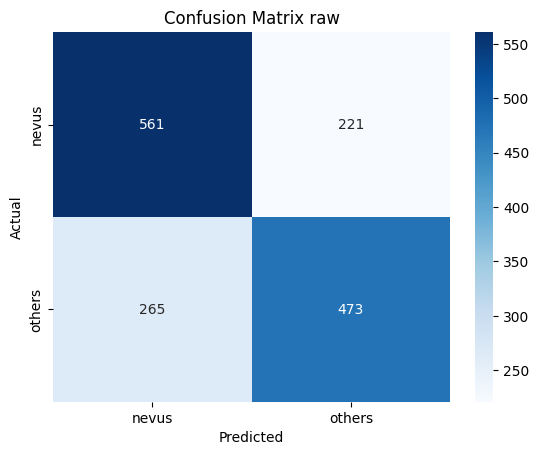

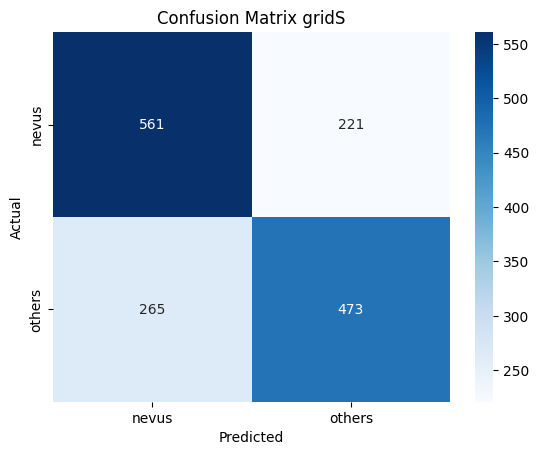

In [221]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
class_names = ['nevus', 'others']
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix raw')
plt.show()

# Confusion matrix
plt.figure()
conf_matrix_other= confusion_matrix(y_val, y_pred_f)
class_names = ['nevus', 'others']
sns.heatmap(conf_matrix_other, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix gridS')
plt.show()

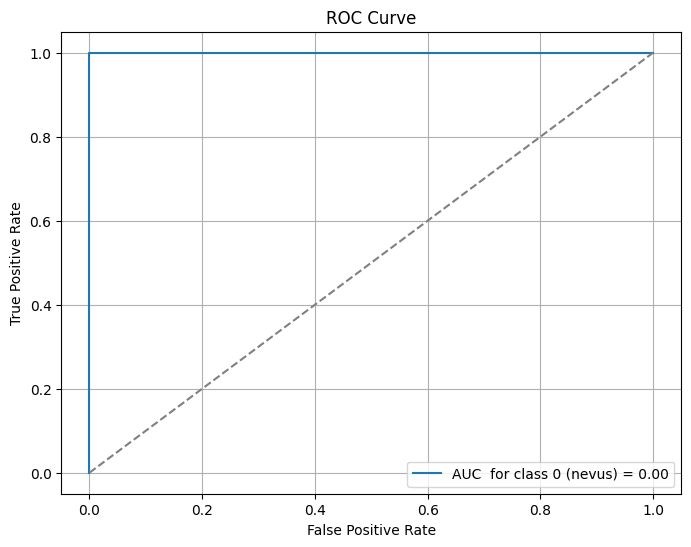

AUC-ROC: 0.00


In [222]:
# AUCROC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
y_prob_1 = model.predict_proba(X_val)[:, 1]

y_prob_0 = 1- y_prob_1
fpr, tpr, thresholds = roc_curve(y_pred_f, y_prob_0, pos_label = 0)
auc = roc_auc_score(y_pred_f, y_prob_0)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC  for class 0 (nevus) = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC value
print(f'AUC-ROC: {auc:.2f}')

# SVM

In [237]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Initialize the SVM model with RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.001, 0.0001],  # Kernel coefficient
    'kernel': ['rbf']             # Only using RBF kernel
}

# Initialize SVM model
svm_model = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1)

grid_search.fit(X_train, y_train)
print(f"Best parameters found: {grid_search.best_params_}")

#Take best model and predict
best_model = grid_search.best_estimator_
y_pred_best_svm = best_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
accuracy_grid = accuracy_score(y_val, y_pred_f)
accuracy_best_svm = accuracy_score(y_val, y_pred_best_svm)

print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Accuracy Grid: {accuracy_grid * 100:.2f}%")
print(f"Validation Accuracy Grid SVM: {accuracy_best_svm * 100:.2f}%")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Validation Accuracy: 69.80%
Validation Accuracy Grid: 69.74%
Validation Accuracy Grid SVM: 74.67%


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Initialize the SVM model with RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.001, 0.0001],  # Kernel coefficient
    'kernel': ['rbf']             # Only using RBF kernel
}

# Initialize SVM model
svm_model = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1)

grid_search.fit(X_train, y_train)
print(f"Best parameters found: {grid_search.best_params_}")

#Take best model and predict
best_model = grid_search.best_estimator_
y_pred_best_svm = best_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
accuracy_grid = accuracy_score(y_val, y_pred_f)
accuracy_best_svm = accuracy_score(y_val, y_pred_best_svm)

print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Accuracy Grid: {accuracy_grid * 100:.2f}%")
print(f"Validation Accuracy Grid SVM: {accuracy_best_svm * 100:.2f}%")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\GitHub_Projects\CADx-Project\virtual_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\GitHub_Projects\CADx-Project\virtual_env\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\GitHub_Projects\CADx-Project\virtual_env\Lib\site-packages\sklearn\svm\_base.py", line 199, in fit
    y = self._validate_targets(y)
        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\GitHub_Projects\CADx-Project\virtual_env\Lib\site-packages\sklearn\svm\_base.py", line 742, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class


# Dealing with black borders (Lens effect)